### Notebook for printing the training losses obtained

Author: Adriana Díaz Soley

Date: May 2024

In [2]:
import os
import matplotlib.pyplot as plt

In [8]:
# Base directory where all the folders are located
base_dir = '/mnt/work/users/adriana.diaz/BASELINE_BATCH_SIZE_512/'

# List of folders to process and their corresponding activities
folder_activity_map = {
    'bf_debug_cereals_baseline_batch512': 'cereals',
    'bf_debug_coffee_baseline_batch512': 'coffee',
    'bf_debug_tea_baseline_batch512': 'tea',
    'bf_debug_milk_baseline_batch512': 'milk',
    'bf_debug_juice_baseline_batch512': 'juice',
    'bf_debug_sandwich_baseline_batch512': 'sandwich',
    'bf_debug_scrambledegg_baseline_batch512': 'scrambledegg',
    'bf_debug_friedegg_baseline_batch512': 'friedegg',
    'bf_debug_salat_baseline_batch512': 'salat',
    'bf_debug_pancake_baseline_batch512': 'pancake',
}

In [9]:
# Function to read the epoch-loss data from Final_Losses.txt
def read_loss_data(folder):
    file_path = os.path.join(base_dir, folder, 'Final_Losses.txt')
    epoch_loss = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                parts = line.strip().split(': ')
                if len(parts) == 2:
                    epoch = int(parts[0].split()[1])
                    loss = float(parts[1])
                    epoch_loss[epoch] = loss
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    return epoch_loss


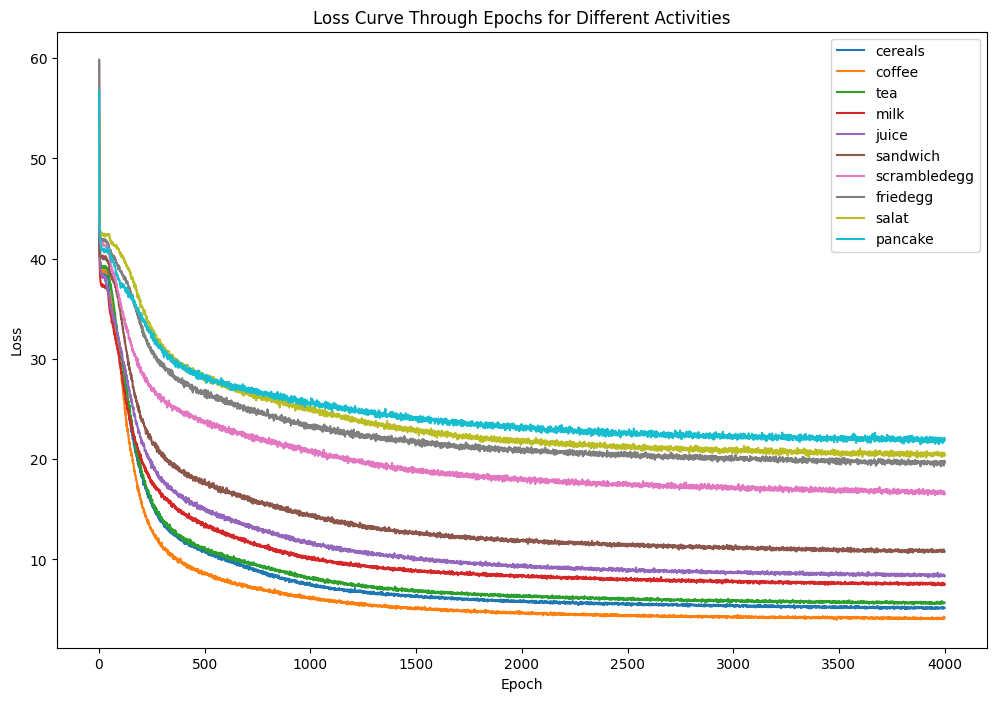

In [10]:
# Plot the loss curves for each activity
plt.figure(figsize=(12, 8))
for folder, activity in folder_activity_map.items():
    epoch_loss = read_loss_data(folder)
    if epoch_loss:
        epochs = list(epoch_loss.keys())
        losses = list(epoch_loss.values())
        plt.plot(epochs, losses, label=activity)

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Through Epochs for Different Activities')
plt.legend()
plt.show()